Robust Stability (RS) is attained if mu(T_I(jw)) < 1/|w_I(jw)| for all applicable omega range


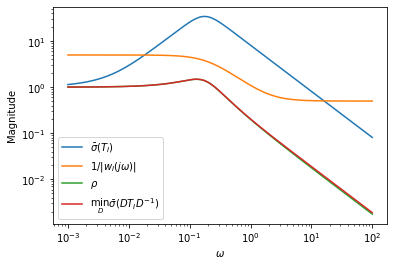

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import utils


I = np.identity(2)

def KG(s):
    Ggain = np.matrix([[-87.8, 1.4],
                       [-108.2, -1.4]])
    Kgain = np.matrix([[-0.0015, 0],
                       [0, -0.075]])
    return 1/s*Kgain*Ggain


def w_I(s):
    """magnitude multiplicative uncertainty in  each input"""
    return (s + 0.2) / (0.5 * s + 1)


def T_I(s):
    return KG(s) * (I + KG(s)).I


def M(s):
    return w_I(s) * T_I(s)


def maxsigma(G):
    return max(utils.sigmas(G))

def specrad(G):
    return max(np.abs(np.linalg.eigvals(G)))

def mu_ubound(G):
    """ We use equation 8.87 and minimise directly
    """
    def scaled_system(d0):
        dn = 1  # we set dn = 1 as in note 10 of 8.8.3
        D = np.asmatrix(np.diag([d0[0], dn]))
        return maxsigma(D*G*D.I)
    r = scipy.optimize.minimize(scaled_system, 1)
    return r['fun']

omega = np.logspace(-3, 2, 200)
s = 1j * omega

T_Is = list(map(T_I, s))

print('Robust Stability (RS) is attained if mu(T_I(jw)) < 1/|w_I(jw)| for all applicable omega range')

def F_of_T_I(func):
    return [func(T) for T in T_Is]

    plt.loglog(omega, F_of_T_I(maxsigma),
               label=r'$\bar\sigma(T_I)$')


plt.loglog(omega, F_of_T_I(maxsigma),
           label=r'$\bar\sigma(T_I)$')
plt.loglog(omega, 1 / np.abs(w_I(s)),
           label=r'$1/|w_I(j\omega)|$')
plt.loglog(omega, F_of_T_I(specrad),
           label=r'$\rho$')
plt.loglog(omega, F_of_T_I(mu_ubound),
           label=r'$\min_{D}\bar\sigma(DT_ID^{-1})$')
plt.legend(loc='best')
plt.xlabel(r'$\omega$')
plt.ylabel('Magnitude')

plt.show()
